In [1]:
import os
import pandas as pd
import numpy as np
import scipy
import anndata
import scanpy as sc
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(style="ticks", color_codes=True)

## Loading Data and Data Wrangling

In [2]:
# Load metadata
cwd = os.getcwd()
meta = pd.read_csv(cwd+'/data/Metadata.txt', sep='\t')
meta

/var/folders/8c/f79_3ppx1r59rycv6tkm4flh0000gn/T/ipykernel_24222/493554089.py:3: DtypeWarning: Columns (4,9,10,11,12,13,14,15,16,17,18,19,20) have mixed types. Specify dtype option on import or set low_memory=False.
  meta = pd.read_csv(cwd+'/data/Metadata.txt', sep='\t')


,NAME,Cell_line,Pool_ID,Cancer_type,Genes_expressed,Discrete_cluster_minpts5_eps1.8,Discrete_cluster_minpts5_eps1.5,Discrete_cluster_minpts5_eps1.2,CNA_subclone,SkinPig_score,...,EMTII_score,EMTIII_score,IFNResp_score,p53Sen_score,EpiSen_score,StressResp_score,ProtMatu_score,ProtDegra_score,G1/S_score,G2/M_score
0,TYPE,group,group,group,numeric,group,group,group,group,numeric,...,numeric,numeric,numeric,numeric,numeric,numeric,numeric,numeric,numeric,numeric
1,AAACCTGAGACATAAC-1-18,NCIH2126_LUNG,18,Lung Cancer,4318,NaN,NaN,NaN,NaN,0.166,...,-0.935,-0.935,0.13,0.619,1.869,-0.004,0.805,0.896,0.424,-1.125
2,AACGTTGTCACCCGAG-1-18,NCIH2126_LUNG,18,Lung Cancer,5200,NaN,NaN,NaN,NaN,-0.213,...,-1.027,-1.027,0.066,1.049,1.267,0.252,1.299,1.61,0.624,-0.048
3,AACTGGTAGACACGAC-1-18,NCIH2126_LUNG,18,Lung Cancer,4004,NaN,NaN,NaN,NaN,-0.101,...,-0.677,-0.677,0.304,0.822,2.401,0.141,0.451,1.225,-0.795,0.064
4,AACTGGTAGGGCTTGA-1-18,NCIH2126_LUNG,18,Lung Cancer,4295,NaN,NaN,NaN,NaN,-0.014,...,-0.735,-0.735,0.094,0.834,2.282,0.15,0.267,0.892,-0.238,1.118
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53509,c4722,JHU006_UPPER_AERODIGESTIVE_TRACT,custom,Head and Neck Cancer,3343,NaN,NaN,NaN,NaN,0.018,...,-0.505,-0.505,1.657,1.583,3.85,0.539,0.473,0.544,-1.079,-1.349
53510,c4724,JHU006_UPPER_AERODIGESTIVE_TRACT,custom,Head and Neck Cancer,6977,NaN,NaN,NaN,NaN,-0.098,...,-0.876,-0.876,0.669,1.086,3.046,0.799,0.49,1.319,-0.37,0.057
53511,c4731,JHU006_UPPER_AERODIGESTIVE_TRACT,custom,Head and Neck Cancer,6638,NaN,NaN,NaN,NaN,-0.112,...,-0.112,-0.112,0.61,0.693,2.289,0.65,0.729,1.143,-0.508,0.501
53512,c4735,JHU006_UPPER_AERODIGESTIVE_TRACT,custom,Head and Neck Cancer,4052,NaN,NaN,NaN,NaN,-0.244,...,1.981,1.981,0.523,-0.309,0.267,0.822,1.049,0.777,0.296,-0.936


In [3]:
# Process metadata and rename columns
meta.drop([0], axis=0, inplace=True)
meta.rename(columns={'NAME':'CellID', 'Cell_line':'CellLine', 'Pool_ID':'Pool', 'Cancer_type':'Indication'}, inplace=True)
meta.set_index('CellID', inplace=False)
meta.head(5)

,CellID,CellLine,Pool,Indication,Genes_expressed,Discrete_cluster_minpts5_eps1.8,Discrete_cluster_minpts5_eps1.5,Discrete_cluster_minpts5_eps1.2,CNA_subclone,SkinPig_score,...,EMTII_score,EMTIII_score,IFNResp_score,p53Sen_score,EpiSen_score,StressResp_score,ProtMatu_score,ProtDegra_score,G1/S_score,G2/M_score
1,AAACCTGAGACATAAC-1-18,NCIH2126_LUNG,18,Lung Cancer,4318,NaN,NaN,NaN,NaN,0.166,...,-0.935,-0.935,0.13,0.619,1.869,-0.004,0.805,0.896,0.424,-1.125
2,AACGTTGTCACCCGAG-1-18,NCIH2126_LUNG,18,Lung Cancer,5200,NaN,NaN,NaN,NaN,-0.213,...,-1.027,-1.027,0.066,1.049,1.267,0.252,1.299,1.61,0.624,-0.048
3,AACTGGTAGACACGAC-1-18,NCIH2126_LUNG,18,Lung Cancer,4004,NaN,NaN,NaN,NaN,-0.101,...,-0.677,-0.677,0.304,0.822,2.401,0.141,0.451,1.225,-0.795,0.064
4,AACTGGTAGGGCTTGA-1-18,NCIH2126_LUNG,18,Lung Cancer,4295,NaN,NaN,NaN,NaN,-0.014,...,-0.735,-0.735,0.094,0.834,2.282,0.15,0.267,0.892,-0.238,1.118
5,AACTGGTAGTACTTGC-1-18,NCIH2126_LUNG,18,Lung Cancer,4842,NaN,NaN,NaN,NaN,0.006,...,-0.821,-0.821,0.034,0.96,1.4,-0.012,-0.276,-0.428,0.267,0.791


In [4]:
# the first three rows are CellID, CellLine, and Pool
# only need the first row, CellID
pd.read_csv(cwd+'/data/UMIcount_data.txt', nrows=10, sep='\t', header=None)

,0,1,2,3,4,5,6,7,8,9,...,56973,56974,56975,56976,56977,56978,56979,56980,56981,56982
0,NaN,AAACCTGAGACATAAC-1-18,AAACCTGCACAACGCC-1-18,AAACCTGCAGACAAGC-1-18,AAACCTGCAGCTCGAC-1-18,AAACCTGCATGGATGG-1-18,AAACCTGGTACGAAAT-1-18,AAACGGGAGATACACA-1-18,AAACGGGCAGGTGCCT-1-18,AAACGGGGTTTAGGAA-1-18,...,c4781,c4784,c4785,c4786,c4787,c4788,c4789,c4793,c4800,c4812
1,Cell_line,NCIH2126_LUNG,SW579_THYROID,C32_SKIN,SW579_THYROID,NCIH446_LUNG,HEC251_ENDOMETRIUM,MFE319_ENDOMETRIUM,SKNAS_AUTONOMIC_GANGLIA,NCIH2452_PLEURA,...,SCC25_UPPER_AERODIGESTIVE_TRACT,SCC25_UPPER_AERODIGESTIVE_TRACT,SCC25_UPPER_AERODIGESTIVE_TRACT,SCC25_UPPER_AERODIGESTIVE_TRACT,93VU_UPPER_AERODIGESTIVE_TRACT,JHU029_UPPER_AERODIGESTIVE_TRACT,SCC9_UPPER_AERODIGESTIVE_TRACT,JHU029_UPPER_AERODIGESTIVE_TRACT,SCC9_UPPER_AERODIGESTIVE_TRACT,SCC9_UPPER_AERODIGESTIVE_TRACT
2,Pool_ID,18,18,18,18,18,18,18,18,18,...,custom,custom,custom,custom,custom,custom,custom,custom,custom,custom
3,A1BG,0,1,1,1,0,2,0,0,0,...,0,0,0,0,0,1,0,0,0,1
4,A1BG-AS1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,A1CF,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,A2M,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,A2M-AS1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
8,A2ML1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,A2ML1-AS1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
# get the cell IDs from UMI count data, later for merging with the actual counts
counts_cellid = pd.read_csv(cwd+'/data/UMIcount_data.txt', nrows=1, sep='\t', header=None)
counts_cellid = counts_cellid.transpose()
counts_cellid.columns = ['CellID']
counts_cellid.drop([0], inplace=True)
counts_cellid

,CellID
1,AAACCTGAGACATAAC-1-18
2,AAACCTGCACAACGCC-1-18
3,AAACCTGCAGACAAGC-1-18
4,AAACCTGCAGCTCGAC-1-18
5,AAACCTGCATGGATGG-1-18
...,...
56978,c4788
56979,c4789
56980,c4793
56981,c4800


In [6]:
%%time

# transpose counts data to have cells as rows and genes as columns
counts = pd.read_csv(cwd+'/data/UMIcount_data.txt', sep='\t', skiprows=3, header=None, index_col=0)
counts = counts.transpose()
counts

CPU times: user 9min 13s, sys: 45.1 s, total: 9min 58s
Wall time: 11min 8s


,A1BG,A1BG-AS1,A1CF,A2M,A2M-AS1,A2ML1,A2ML1-AS1,A2ML1-AS2,A3GALT2,A4GALT,...,PRICKLE4,RABL6,RAET1E-AS1,RGS5,SERPINA3,SPATA13,TBC1D26,TIMM10B,TMBIM4,TMEM256-PLSCR3
1,0,0,0,0,0,0,0,0,0,0,...,0,6,0,0,0,0,0,1,0,0
2,1,0,0,0,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,2,0,0,0,1,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56978,1,0,0,0,0,0,0,0,0,0,...,0,2,0,0,0,0,0,4,4,0
56979,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
56980,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
56981,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [7]:
# add the cell info back
counts.index = counts_cellid['CellID']
counts.index.name = None
counts.head(5)

,A1BG,A1BG-AS1,A1CF,A2M,A2M-AS1,A2ML1,A2ML1-AS1,A2ML1-AS2,A3GALT2,A4GALT,...,PRICKLE4,RABL6,RAET1E-AS1,RGS5,SERPINA3,SPATA13,TBC1D26,TIMM10B,TMBIM4,TMEM256-PLSCR3
AAACCTGAGACATAAC-1-18,0,0,0,0,0,0,0,0,0,0,...,0,6,0,0,0,0,0,1,0,0
AAACCTGCACAACGCC-1-18,1,0,0,0,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
AAACCTGCAGACAAGC-1-18,1,0,0,0,0,0,0,0,0,0,...,0,2,0,0,0,1,0,0,0,0
AAACCTGCAGCTCGAC-1-18,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AAACCTGCATGGATGG-1-18,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
a = counts.index.isin(meta['CellID'])
counts = counts[a]
counts

,A1BG,A1BG-AS1,A1CF,A2M,A2M-AS1,A2ML1,A2ML1-AS1,A2ML1-AS2,A3GALT2,A4GALT,...,PRICKLE4,RABL6,RAET1E-AS1,RGS5,SERPINA3,SPATA13,TBC1D26,TIMM10B,TMBIM4,TMEM256-PLSCR3
AAACCTGAGACATAAC-1-18,0,0,0,0,0,0,0,0,0,0,...,0,6,0,0,0,0,0,1,0,0
AAACCTGCACAACGCC-1-18,1,0,0,0,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
AAACCTGCAGACAAGC-1-18,1,0,0,0,0,0,0,0,0,0,...,0,2,0,0,0,1,0,0,0,0
AAACCTGCAGCTCGAC-1-18,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AAACCTGCATGGATGG-1-18,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
c4788,1,0,0,0,0,0,0,0,0,0,...,0,2,0,0,0,0,0,4,4,0
c4789,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
c4793,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
c4800,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [9]:
# check the numbers of cells and genes
# columns represent genes, row names represent unique cell identifiers
counts.shape

(53513, 30314)

In [10]:
# re-order the metadata to match the order of the counts - to match the order of the cells
meta = meta.set_index('CellID')
meta = meta.reindex(index=counts.index)
meta

,CellLine,Pool,Indication,Genes_expressed,Discrete_cluster_minpts5_eps1.8,Discrete_cluster_minpts5_eps1.5,Discrete_cluster_minpts5_eps1.2,CNA_subclone,SkinPig_score,EMTI_score,EMTII_score,EMTIII_score,IFNResp_score,p53Sen_score,EpiSen_score,StressResp_score,ProtMatu_score,ProtDegra_score,G1/S_score,G2/M_score
AAACCTGAGACATAAC-1-18,NCIH2126_LUNG,18,Lung Cancer,4318,NaN,NaN,NaN,NaN,0.166,-0.045,-0.935,-0.935,0.13,0.619,1.869,-0.004,0.805,0.896,0.424,-1.125
AAACCTGCACAACGCC-1-18,SW579_THYROID,18,Thyroid Cancer,5021,NaN,NaN,SW579_THYROID_1,NaN,-0.056,0.776,0.953,0.953,-0.266,-0.334,-1.125,-0.039,-0.243,-0.642,-0.173,1.365
AAACCTGCAGACAAGC-1-18,C32_SKIN,18,Skin Cancer,3047,NaN,NaN,NaN,NaN,1.092,0.617,-0.034,-0.034,0.318,0.57,-0.165,0.074,0.25,0.096,-0.367,-1.135
AAACCTGCAGCTCGAC-1-18,SW579_THYROID,18,Thyroid Cancer,2765,NaN,NaN,SW579_THYROID_1,NaN,-0.601,1.038,1.952,1.952,0.341,-0.253,-0.552,0.921,2.876,1.645,0.226,0.469
AAACCTGCATGGATGG-1-18,NCIH446_LUNG,18,Lung Cancer,2064,NaN,NaN,NaN,NaN,-0.251,-0.325,0.258,0.258,-0.044,-1.256,-0.367,-0.317,0.79,1.925,0.138,-0.384
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
c4788,JHU029_UPPER_AERODIGESTIVE_TRACT,custom,Head and Neck Cancer,5929,JHU029_UPPER_AERODIGESTIVE_TRACT_1,JHU029_UPPER_AERODIGESTIVE_TRACT_1,JHU029_UPPER_AERODIGESTIVE_TRACT_1,NaN,-0.317,-0.39,0.023,0.023,-0.1,-0.604,-0.358,-0.123,0.067,0.804,0.135,0.264
c4789,SCC9_UPPER_AERODIGESTIVE_TRACT,custom,Head and Neck Cancer,3531,SCC9_UPPER_AERODIGESTIVE_TRACT_2,SCC9_UPPER_AERODIGESTIVE_TRACT_2,SCC9_UPPER_AERODIGESTIVE_TRACT_2,SCC9_UPPER_AERODIGESTIVE_TRACT_2,0.238,1.176,2.094,2.094,0.014,-0.045,-0.05,0.214,0.238,-0.514,-1.021,-1.243
c4793,JHU029_UPPER_AERODIGESTIVE_TRACT,custom,Head and Neck Cancer,4029,JHU029_UPPER_AERODIGESTIVE_TRACT_1,JHU029_UPPER_AERODIGESTIVE_TRACT_3,NaN,NaN,-0.164,-0.163,-0.405,-0.405,0.01,-0.008,0.045,0.265,0.054,-0.466,0.345,0.804
c4800,SCC9_UPPER_AERODIGESTIVE_TRACT,custom,Head and Neck Cancer,4009,SCC9_UPPER_AERODIGESTIVE_TRACT_1,SCC9_UPPER_AERODIGESTIVE_TRACT_1,SCC9_UPPER_AERODIGESTIVE_TRACT_4,SCC9_UPPER_AERODIGESTIVE_TRACT_1,0.205,0.217,0.833,0.833,-0.257,-0.856,-0.593,0.152,0.022,0.684,0.684,0.624


In [11]:
# sanity check to make sure the order of the cells in the metadata matches the order of the cells in the counts
# if true then the two indices should be the same - expression data and metadata aligned correctly
counts.index.equals(meta.index)

True

## Building the annData object
#### Structure 

AnnData refer to cells as observations and genes as variables. This data structure has four areas where we can store information (from [here](https://chanzuckerberg.github.io/scRNA-python-workshop/preprocessing/00-tabula-muris.html)):

- AnnData.X stores the count matrix
- AnnData.obs stores metadata about the observations (cells)
- AnnData.var stores metadata about the variables (genes)
- AnnData.uns stores any additional, unstructured information we decide to attach later.

In [12]:
# convert to anndata object - but first convert counts to sparse matrix for memory efficiency
adata = anndata.AnnData(X=scipy.sparse.csr_matrix(counts),
                        obs=meta,
                        var=counts.columns.to_frame())
# delete original counts data to save memory
del counts
adata.var.drop(columns=[0], inplace=True)
adata.var.index.name = None
adata

AnnData object with n_obs × n_vars = 53513 × 30314
    obs: 'CellLine', 'Pool', 'Indication', 'Genes_expressed', 'Discrete_cluster_minpts5_eps1.8', 'Discrete_cluster_minpts5_eps1.5', 'Discrete_cluster_minpts5_eps1.2', 'CNA_subclone', 'SkinPig_score', 'EMTI_score', 'EMTII_score', 'EMTIII_score', 'IFNResp_score', 'p53Sen_score', 'EpiSen_score', 'StressResp_score', 'ProtMatu_score', 'ProtDegra_score', 'G1/S_score', 'G2/M_score'

In [13]:
# convert metadata columns to appropriate data types
adata.obs['CellLine'] = adata.obs['CellLine'].astype(str)
adata.obs['Pool'] = adata.obs['Pool'].astype(str)
adata.obs['Indication'] = adata.obs['Indication'].astype(str)
adata.obs['Genes_expressed'] = adata.obs['Genes_expressed'].astype(int)
adata.obs['Discrete_cluster_minpts5_eps1.8'] = adata.obs['Discrete_cluster_minpts5_eps1.8'].astype(str)
adata.obs['Discrete_cluster_minpts5_eps1.5'] = adata.obs['Discrete_cluster_minpts5_eps1.5'].astype(str)
adata.obs['Discrete_cluster_minpts5_eps1.2'] = adata.obs['Discrete_cluster_minpts5_eps1.2'].astype(str)
adata.obs['CNA_subclone'] = adata.obs['CNA_subclone'].astype(str)
adata.obs['SkinPig_score'] = adata.obs['SkinPig_score'].astype(float)
adata.obs['EMTI_score'] = adata.obs['EMTI_score'].astype(float)
adata.obs['EMTII_score'] = adata.obs['EMTII_score'].astype(float)
adata.obs['EMTIII_score'] = adata.obs['EMTIII_score'].astype(float)
adata.obs['IFNResp_score'] = adata.obs['IFNResp_score'].astype(float)
adata.obs['p53Sen_score'] = adata.obs['p53Sen_score'].astype(float)
adata.obs['EpiSen_score'] = adata.obs['EpiSen_score'].astype(float)
adata.obs['StressResp_score'] = adata.obs['StressResp_score'].astype(float)
adata.obs['ProtMatu_score'] = adata.obs['ProtMatu_score'].astype(float)
adata.obs['ProtDegra_score'] = adata.obs['ProtDegra_score'].astype(float)
adata.obs['G1/S_score'] = adata.obs['G1/S_score'].astype(float)
adata.obs['G2/M_score'] = adata.obs['G2/M_score'].astype(float)

In [14]:
# write raw annData data to h5ad file
# adata.write(cwd+'/data/brain_raw.h5ad') 

## Quality control
 - No spike-ins info in the original dataset 
 - Simplify compute quality metrics and then filter cells and genes accordingly.

In [15]:
# scanpy qc metrics, outputs cell_qc and gene_qc dataframes
qc = sc.pp.calculate_qc_metrics(adata, expr_type='counts', var_type='genes', inplace=False)
cell_qc_dataframe = qc[0]
gene_qc_dataframe = qc[1]

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


#### Quality control for cells 

##### Library Size
- Consider total numbers of reads per cell.
- Few reads likely from broken cell or cell inadequately captured should be excluded.

In [16]:
# cell quality control df
cell_qc_dataframe 

,n_genes_by_counts,log1p_n_genes_by_counts,total_counts,log1p_total_counts,pct_counts_in_top_50_genes,pct_counts_in_top_100_genes,pct_counts_in_top_200_genes,pct_counts_in_top_500_genes
AAACCTGAGACATAAC-1-18,4323,8.371936,28249,10.248849,32.337428,45.644094,57.226804,70.714008
AAACCTGCACAACGCC-1-18,5034,8.524169,25141,10.132295,29.342508,38.705700,48.239927,61.656259
AAACCTGCAGACAAGC-1-18,3055,8.024862,12143,9.404590,33.500782,44.840649,56.188751,69.702709
AAACCTGCAGCTCGAC-1-18,2769,7.926603,7154,8.875567,28.669276,36.105675,44.925916,60.162147
AAACCTGCATGGATGG-1-18,2065,7.633370,7750,8.955577,30.516129,44.529032,57.019355,73.264516
...,...,...,...,...,...,...,...,...
c4788,5934,8.688622,55684,10.927466,26.481575,40.359888,53.266648,68.030314
c4789,3533,8.170186,20240,9.915466,44.540514,54.916008,64.491107,75.755929
c4793,4032,8.302266,19635,9.885120,35.604787,48.953400,59.740260,70.888719
c4800,4011,8.297045,23431,10.061858,29.956041,42.179164,54.824805,69.992745


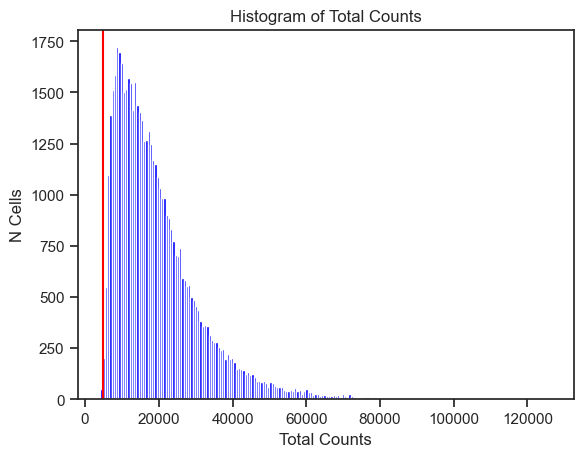

In [17]:
plt.hist(cell_qc_dataframe['total_counts'], bins=200, color='blue')
plt.xlabel('Total Counts')
plt.ylabel('N Cells')
plt.axvline(5000, color='red')
plt.title('Histogram of Total Counts')
plt.show()

- Majority of the cells have > 5000 reads. Can retain those cells.

##### Gene Detected
-  Varies by  protocol and sequencing depth.
- Ensure sequencing depth for each sample, reads should be evenly distributed across the transcriptome. 
-  Count unique genes detected in each sample.
- Should be normally distritbuted for approximately equal detection rates across samples.
- If not, drop the cells having genes < threshold 

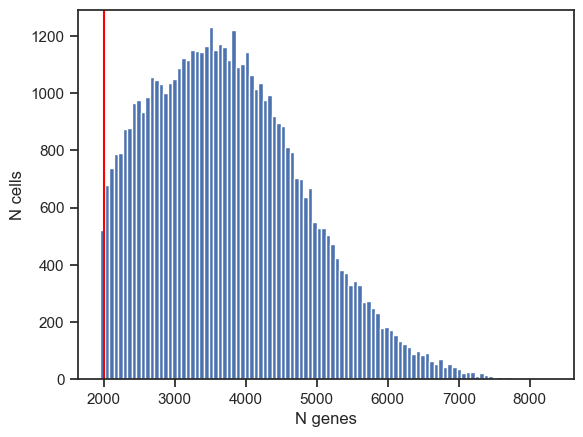

In [18]:
plt.hist(cell_qc_dataframe['n_genes_by_counts'], bins=100)
plt.xlabel('N genes')
plt.ylabel('N cells')
plt.axvline(2000, color='red')

- Majority of cells have >2000 genes expressed, most cells can be retained. 

#### Quality control for genes

##### Detectability
- Genes with "undetectable" expression levels should typically be removed.
- A gene is considered "detectable" if at least 10 cells have > 5 reads from that gene. Threshold depending on sequencing depth.
- Some genes might only be detected in low-quality cells, which could affect the filtering process.

In [19]:
# gene quality control df
gene_qc_dataframe 

,n_cells_by_counts,mean_counts,log1p_mean_counts,pct_dropout_by_counts,total_counts,log1p_total_counts
A1BG,14057,0.466018,0.382550,73.731617,24938,10.124188
A1BG-AS1,2940,0.061462,0.059647,94.506008,3289,8.098643
A1CF,582,0.014931,0.014821,98.912414,799,6.684612
A2M,1632,0.061966,0.060122,96.950274,3316,8.106816
A2M-AS1,230,0.004373,0.004363,99.570198,234,5.459586
...,...,...,...,...,...,...
SPATA13,5873,0.129221,0.121528,89.025097,6915,8.841593
TBC1D26,5,0.000093,0.000093,99.990656,5,1.791759
TIMM10B,20879,0.573412,0.453247,60.983312,30685,10.331562
TMBIM4,2990,0.114981,0.108838,94.412573,6153,8.724858


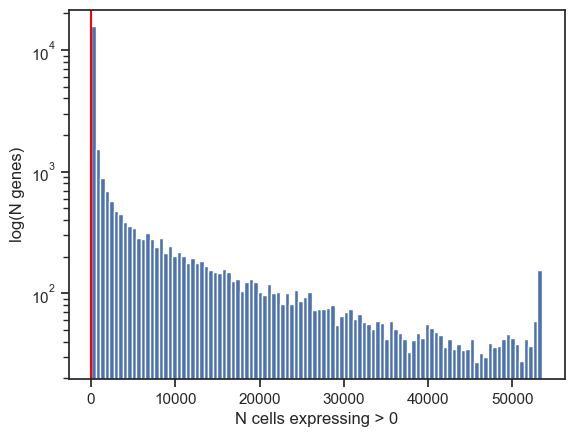

In [20]:
plt.hist(gene_qc_dataframe['n_cells_by_counts'], bins=100)
plt.xlabel('N cells expressing > 0')
plt.ylabel('log(N genes)') 
plt.axvline(2, color='red')
plt.yscale('log') 

- All cells express some genes, should be able to retain most cells
- Some genes aren't highly expressed  (< 100 cells express them)

In [21]:
# filter the AnnData object based on the QC metrics on expression data
# removes genes expressed <  10 cells, and excludes cells with < 200 detected genes
sc.pp.filter_cells(adata, min_genes=200)
sc.pp.filter_genes(adata, min_cells=10)
adata

AnnData object with n_obs × n_vars = 53513 × 23081
    obs: 'CellLine', 'Pool', 'Indication', 'Genes_expressed', 'Discrete_cluster_minpts5_eps1.8', 'Discrete_cluster_minpts5_eps1.5', 'Discrete_cluster_minpts5_eps1.2', 'CNA_subclone', 'SkinPig_score', 'EMTI_score', 'EMTII_score', 'EMTIII_score', 'IFNResp_score', 'p53Sen_score', 'EpiSen_score', 'StressResp_score', 'ProtMatu_score', 'ProtDegra_score', 'G1/S_score', 'G2/M_score', 'n_genes'
    var: 'n_cells'

In [22]:
# columns represent genes, row names represent unique cell identifiers
# all cells have at least 200 genes and all genes are expressed in at least 10 cells
# all cells retained, genes filtered from  30314 to 23081
adata.shape

(53513, 23081)

In [23]:
## Final dimensions of the QC'd dataset
!mkdir outs/
adata.write(cwd+'/outs/240701_kinker_anndata.h5ad')